<h1>Introduction to regression</h1>
In this notebook we will have an overview of regression and how scikit-learn can be used to regress data.

In [3]:
# Importing the holy trinity of data science.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# getting seaborn online to give our graphics a kick.
import seaborn as sns
sns.set()

First, let us work towards building an intuition of the problem at hand by considering the dataset ds1 below,

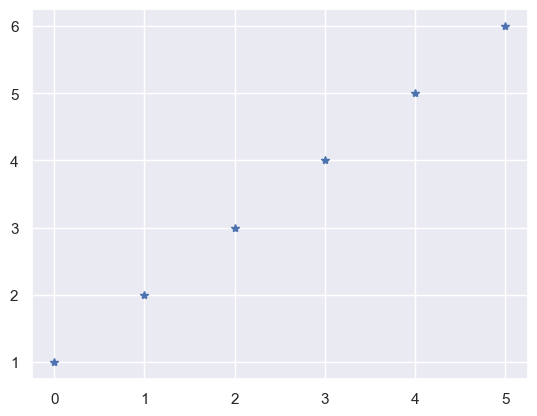

In [4]:
ds1 = [1,2,3,4,5,6]
plt.plot(ds1, marker='*',linestyle='')

Assuming that the red dot in the plot is a continuation of the dataset ds1 how can you workout the continuation of the this sequence?

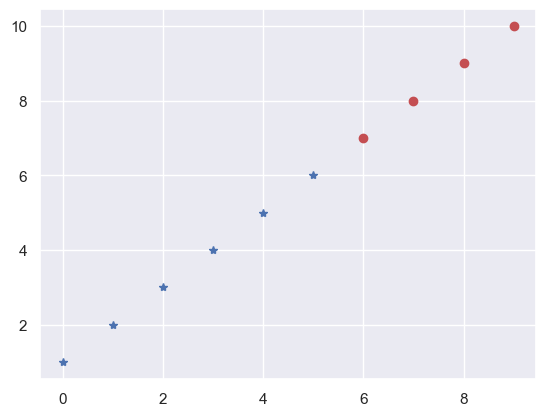

In [5]:
plt.plot(ds1, marker='*',linestyle='')
plt.scatter(np.arange(6,10),np.arange(7,11),c='r')

Linear equations take the shape:

$$ Y = aX+b$$

From this, all we need is two points to workout the coefficient $$a$$ and knowing the value of $$Y(X=0)$$ to obtain B.

Question, would this logic work for the dataset plotted below?

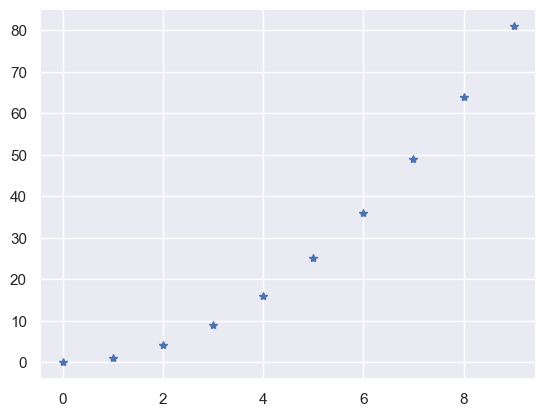

In [6]:
ds2 = [x**2 for x in range(10)]
plt.plot(ds2, marker='*',linestyle='')

In [7]:
del ds1,ds2

Now let us import our dataset.

In [8]:
df = pd.read_csv('ds_salaries (1).csv',sep=',',index_col=0)

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


<AxesSubplot:>

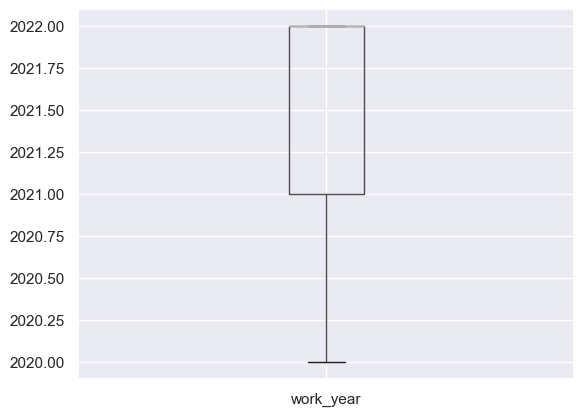

In [11]:
df.boxplot(column='work_year')

In [12]:
df.salary_in_usd.max()

600000

Exercises:

- what would you consider an average, low and high salary for data scientist worldwide and in GB?

- Can you make a graphic containing the distribution of these salaries?

- Compare the salaries of DSs that work at the office, hybrid or remote.

In [13]:
df.salary.describe()

count    6.070000e+02
mean     3.240001e+05
std      1.544357e+06
min      4.000000e+03
25%      7.000000e+04
50%      1.150000e+05
75%      1.650000e+05
max      3.040000e+07
Name: salary, dtype: float64

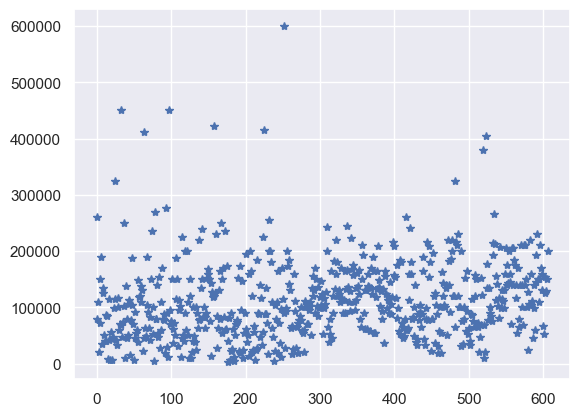

In [14]:
plt.plot(df.salary_in_usd, marker='*',linestyle='')


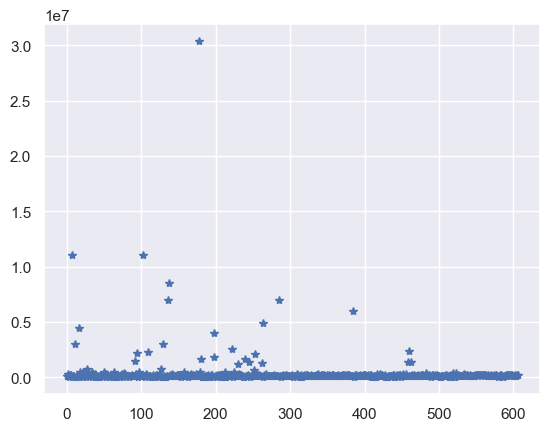

In [15]:
plt.plot(df.salary, marker='*',linestyle='')

In [16]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [17]:
df.max()

work_year                             2022
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       600000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

In [18]:
df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [20]:
df[df.company_location == 'US'].salary_in_usd.describe()


count       355.000000
mean     144055.261972
std       69906.895041
min        5679.000000
25%      100000.000000
50%      135000.000000
75%      170000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:>

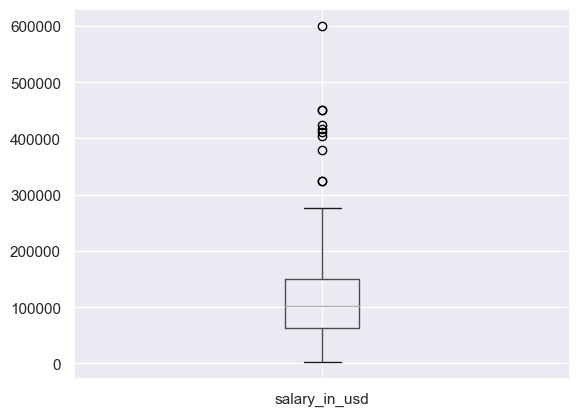

In [21]:
df.boxplot(column='salary_in_usd')

In [22]:
df.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [23]:
df[df.company_location == 'GB'].salary_in_usd.describe()

count        47.000000
mean      81583.042553
std       29524.011146
min       37300.000000
25%       57575.000000
50%       78526.000000
75%      103931.000000
max      183228.000000
Name: salary_in_usd, dtype: float64

In [24]:
len(df[df.company_location != df.employee_residence])

51

<AxesSubplot:>

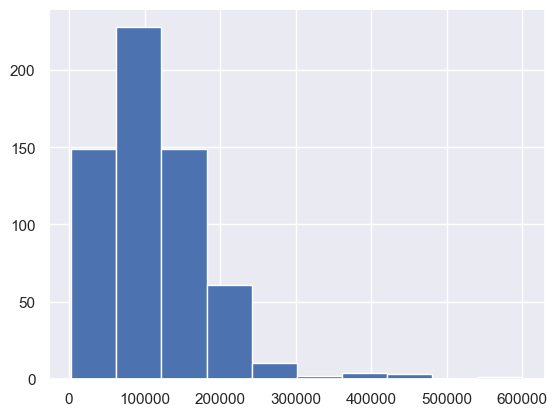

In [25]:
df.salary_in_usd.hist()

<h1>Data prep</h1>
Now we will prepare the data to be fed into the machine learning models.

Exercise: are there any columns that should be excluded?

In [26]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [90]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', '{x}_enc', 'work_year_enc',
       'experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'remote_ratio_enc', 'company_location_enc',
       'company_size_enc', '{x}_enc_enc', 'salary_in_usd_sc'],
      dtype='object')

Exercise: is there any missing data that needs to be dealt with? (if so, do it!)

In [28]:
df = df.drop(['salary', 'salary_currency'], axis=1)

Exercise: find what columns should be encoded and encode them.

In [29]:
# Hint, use:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [64]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', '{x}_enc', 'work_year_enc',
       'experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'remote_ratio_enc', 'company_location_enc',
       'company_size_enc', '{x}_enc_enc', 'salary_in_usd_sc'],
      dtype='object')

In [31]:
df.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [56]:
for x in df.keys():
    if x == 'salary_in_usd':
        print('skip')
    else:
        df[f'{x}_enc']=le.fit_transform(df[x])
 

skip


In [65]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', '{x}_enc', 'work_year_enc',
       'experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'remote_ratio_enc', 'company_location_enc',
       'company_size_enc', '{x}_enc_enc', 'salary_in_usd_sc'],
      dtype='object')

In [35]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

Exercise: find which columns should be scaled and do it.

In [48]:
# Hint, use:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [61]:
salary = df['salary_in_usd'].to_numpy()
salary = salary.reshape(-1,1)
df['salary_in_usd_sc'] = MinMaxScaler().fit_transform(salary)

In [60]:
salary = df['salary_in_usd'].to_numpy()

In [59]:
print(salary)

[[ 79833]
 [260000]
 [109024]
 [ 20000]
 [150000]
 [ 72000]
 [190000]
 [ 35735]
 [135000]
 [125000]
 [ 51321]
 [ 40481]
 [ 39916]
 [ 87000]
 [ 85000]
 [  8000]
 [ 41689]
 [114047]
 [  5707]
 [ 56000]
 [ 43331]
 [  6072]
 [ 47899]
 [ 98000]
 [115000]
 [325000]
 [ 42000]
 [ 33511]
 [100000]
 [117104]
 [ 59303]
 [ 70000]
 [ 68428]
 [450000]
 [ 46759]
 [ 74130]
 [103000]
 [250000]
 [ 10000]
 [138000]
 [ 45760]
 [ 79833]
 [ 50180]
 [106000]
 [112872]
 [ 15966]
 [ 76958]
 [188000]
 [105000]
 [ 70139]
 [  6072]
 [ 91000]
 [ 45896]
 [ 54742]
 [ 60000]
 [148261]
 [ 38776]
 [118000]
 [120000]
 [138350]
 [110000]
 [130800]
 [ 21669]
 [412000]
 [ 45618]
 [ 62726]
 [ 49268]
 [190200]
 [105000]
 [ 91237]
 [ 62726]
 [ 42197]
 [ 82528]
 [150000]
 [235000]
 [ 53192]
 [100000]
 [  5409]
 [270000]
 [ 80000]
 [ 79197]
 [140000]
 [ 54238]
 [ 47282]
 [153667]
 [ 28476]
 [ 59102]
 [110000]
 [170000]
 [ 80000]
 [ 88654]
 [ 76833]
 [ 19609]
 [276000]
 [ 29751]
 [ 89294]
 [ 12000]
 [450000]
 [ 70000]
 [ 95746]


Exercise: split the dataset into a training and test set.

In [39]:
# hint.
from sklearn.model_selection import train_test_split

In [72]:
train, test = train_test_split(df, random_state=42)

In [66]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', '{x}_enc', 'work_year_enc',
       'experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'remote_ratio_enc', 'company_location_enc',
       'company_size_enc', '{x}_enc_enc', 'salary_in_usd_sc'],
      dtype='object')

In [73]:
X_train = train[['work_year_enc','experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'remote_ratio_enc', 'company_location_enc','company_size_enc']]
X_test = test[['work_year_enc','experience_level_enc', 'employment_type_enc', 'job_title_enc',
       'employee_residence_enc', 'remote_ratio_enc', 'company_location_enc','company_size_enc']]

y_train = train['salary_in_usd_sc']
y_test = test['salary_in_usd_sc']


<h1>Decision Tree Regressor</h1>
Now we will use the decision tree regressor 

[(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 

to try to estimate the values.

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
# Notice how similar it is with the classification trees.
DTR = DecisionTreeRegressor(random_state=42)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

(-0.03744015232583259, 0.7862431988424843)

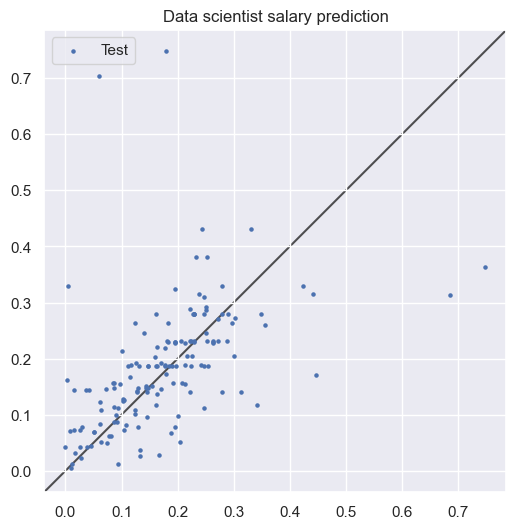

In [83]:
fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=5, label='Test')

ax.set_title(f'Data scientist salary prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

Exercise: calculate MAE and MSE.

In [76]:
# Hint.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

It is often useful to have an x=y line in to compare the results.

(-0.03744015232583259, 0.7862431988424843)

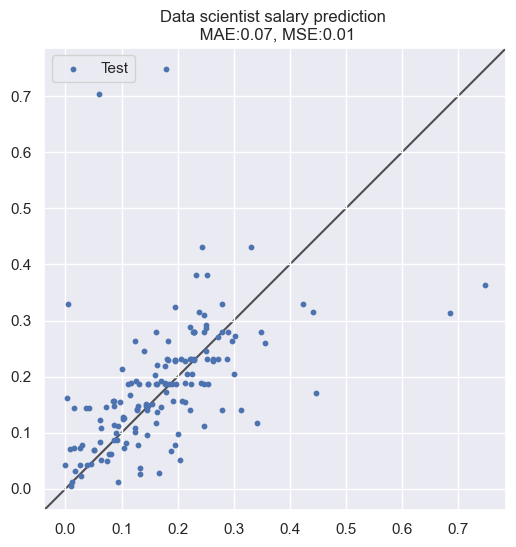

In [87]:
ys_mae = mean_absolute_error(y_test,y_pred)
ys_mse = mean_squared_error(y_test,y_pred)

fig, ax = plt.subplots(1,1,figsize=(14,6))

ax.scatter(y_test,y_pred, s=10, label='Test')

ax.set_title(f'Data scientist salary prediction \n MAE:{ys_mae:.2f}, MSE:{ys_mse:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

<h1>Random Forest Regressor</h1>

Check the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [78]:
from sklearn.ensemble import RandomForestRegressor

Exercise: make a regression using the random forest regressor and plot your results.

Exercise: try increasing the depth and observe how it changes

<h1>Support Vector Machines</h1>

Link to the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [91]:
from sklearn.svm import SVR

Exercise: you know the drill.

<h1>Pipelining</h1>

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
 # We don't need to put the scaler there because we already took care of it.
regr = make_pipeline(SVR(C=1.0, epsilon=0.2))

In [ ]:
regr.fit(X_train,y_train)

In [ ]:
# Checking which parameters can be tunned.
regr.get_params()

In [ ]:
parameteres = {'svr__C':[0.001,0.1,10,100,10e5], 'svr__gamma':[0.1,0.01]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining the gridsearch.
grid = GridSearchCV(regr, 
                    param_grid=parameteres, 
                    cv=5)

In [ ]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

Final Exercise: improve the model accuracy. Feel free to use any methods and tools you see fit.